In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("/content/practice_data.xlsx")
data.head()

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes


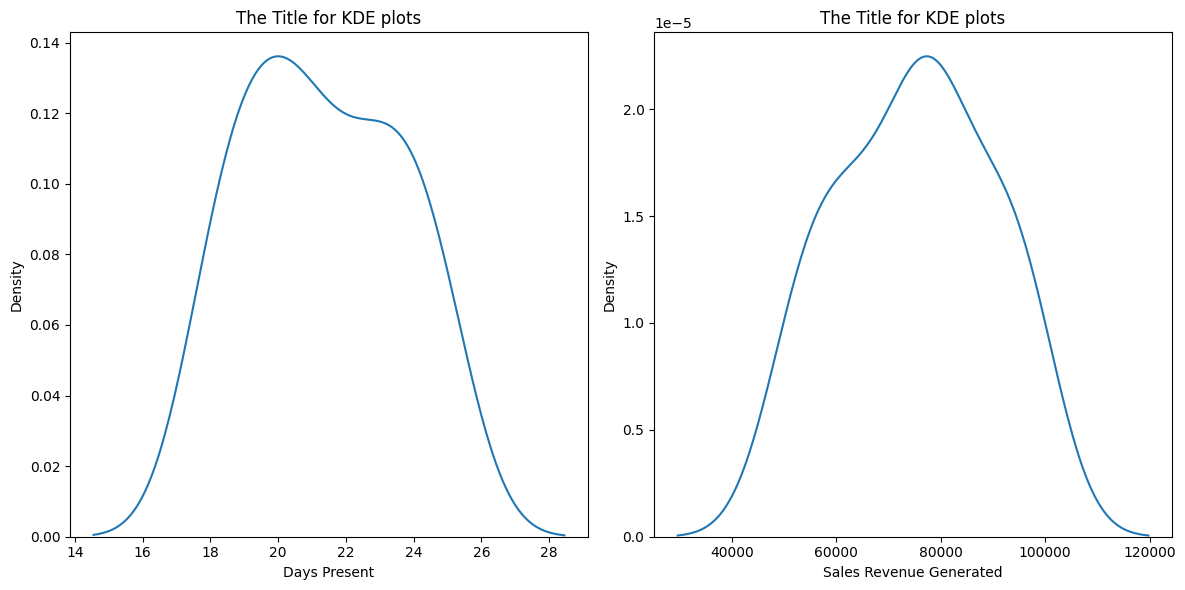

In [16]:
# check + distribution
numeric_column=['Days Present','Sales Revenue Generated']
fig,axes=plt.subplots(1,2,figsize=(12,6))

for index,column in enumerate (numeric_column):
  sns.kdeplot(data[column],ax=axes[index])
  axes[index].set_title('The Title for KDE plots')


plt.tight_layout()
plt.show()



In [17]:
#normality test

from scipy.stats import shapiro

numeric_columns = ['Days Present','Sales Revenue Generated']
shapiro_results={}

for column in numeric_columns:
  stat,p_value = shapiro(data[column])
  shapiro_results[column] = round(p_value,3)

shapiro_results


{'Days Present': np.float64(0.044),
 'Sales Revenue Generated': np.float64(0.12)}

In [19]:
#square root transformation

column_name=data['Sales Revenue Generated']
def sqrt_transformation(data,column_name):
    data[f'{column_name}_sqrt'] = np.sqrt(data[column_name])
    stat, p_value = shapiro(data[f'{column_name}_sqrt'])
    distribution = sns.kdeplot(data[f'{column_name}_sqrt'])
    print(distribution)
print('p-value: ', p_value)

p-value:  0.11957865469745638


In [20]:
#log distribution
column_name=data['Sales Revenue Generated']
def log_transformation(data, column_name):
    data[f'{column_name}_log'] = np.log(data[column_name])
    stat, p_value = shapiro(data[f'{column_name}_log'])
    distribution = sns.kdeplot(data[f'{column_name}_log'])
    print(distribution)
print('p-value: ', p_value)


p-value:  0.11957865469745638


In [21]:
# Calculate range
max_revenue = data['Sales Revenue Generated'].max()
min_revenue = data['Sales Revenue Generated'].min()
revenue_range = max_revenue - min_revenue

print(f"Max Revenue: ₹{max_revenue}")
print(f"Min Revenue: ₹{min_revenue}")
print(f"Revenue Range: ₹{revenue_range}")

Max Revenue: ₹97797
Min Revenue: ₹51638
Revenue Range: ₹46159
